In [ ]:
#Connect colab with google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Internship/Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')

In [ ]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [ ]:
(df.isnull().sum())

,0
City,117
Year,117
Sport,117
Discipline,117
Event,117
Athlete,117
Gender,117
Country_Code,117
Country,117
Event_gender,117


In [ ]:
df.dropna(inplace=True)

In [ ]:
(df.isnull().sum())

,0
City,0
Year,0
Sport,0
Discipline,0
Event,0
Athlete,0
Gender,0
Country_Code,0
Country,0
Event_gender,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


# Exploratory Data Analysis (EDA)

In [ ]:
(df['Medal'].value_counts())

,count
Medal,
Bronze,5258
Gold,5042
Silver,5016


In [ ]:
# Top 10 countries by medals
top_countries = df['Country'].value_counts().head(10)
print(top_countries)

Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: count, dtype: int64


In [ ]:
# Gender distribution
(df['Gender'].value_counts())

,count
Gender,
Men,9388
Women,5928


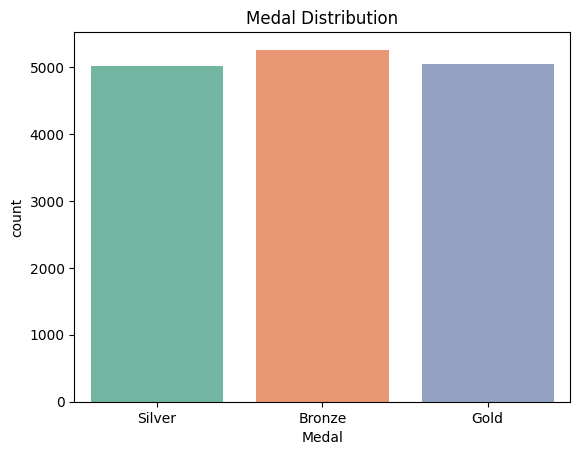

In [ ]:
# Medal distribution
sns.countplot(x='Medal', hue='Medal', data=df, palette='Set2', legend=False)
plt.title("Medal Distribution")
plt.show()


Text(0.5, 1.0, 'Medals by Gender')

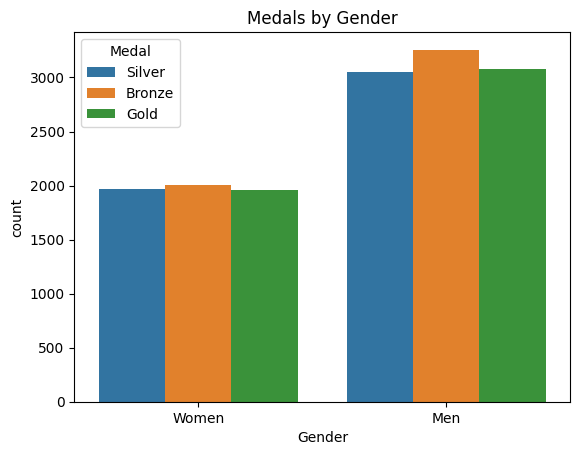

In [ ]:
# Medals by Gender
sns.countplot(x='Gender', hue='Medal', data=df)
plt.title("Medals by Gender")

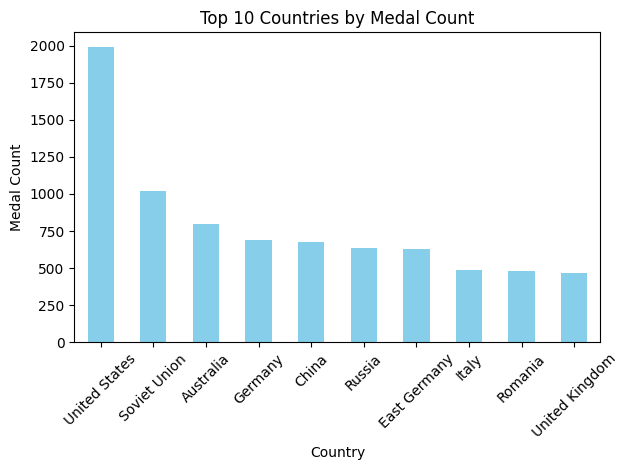

In [ ]:
# Top countries by medals
top_10 = df['Country'].value_counts().head(10)
top_10.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Medal Count")
plt.ylabel("Medal Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

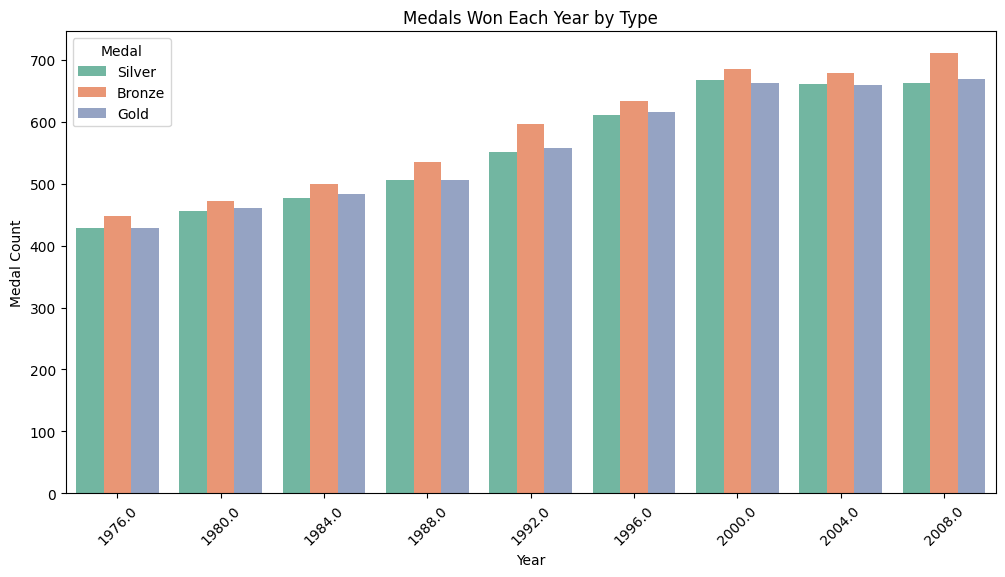

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', hue='Medal', data=df, palette='Set2')
plt.title('Medals Won Each Year by Type')
plt.ylabel("Medal Count")
plt.xticks(rotation=45)
plt.show()

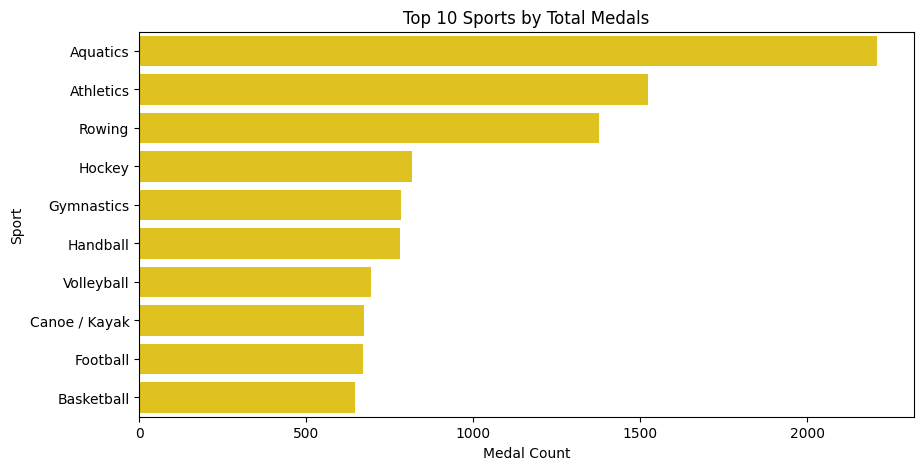

In [ ]:
top_sports = df['Sport'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_sports.values, y=top_sports.index, color='gold')
plt.title('Top 10 Sports by Total Medals')
plt.xlabel('Medal Count')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Convert categorical to numeric
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Event'] = le.fit_transform(df['Event'])
df['Sport'] = le.fit_transform(df['Sport'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Medal'] = le.fit_transform(df['Medal'])

In [ ]:
# Select features and target
X = df[['Year', 'Sport', 'Event', 'Gender', 'Country']]
y = df['Medal']

# **ML Model: Random Forest**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74      1027
           1       0.75      0.72      0.73      1043
           2       0.73      0.73      0.73       994

    accuracy                           0.73      3064
   macro avg       0.73      0.73      0.73      3064
weighted avg       0.73      0.73      0.73      3064

Confusion Matrix:
 [[771 130 126]
 [151 747 145]
 [148 124 722]]
